# Load Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load Data
We read the data from a csv file into a Pandas DataFrame.

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


# Preprocess Data
For now, we care about the total production of honey per year. We use the .groupby() method provided by pandas to get the mean of totalprod per year.

We create a variable called X that is the column of years in this prod_per_year DataFrame. We create a variable called y that is the totalprod column in the prod_per_year dataset. Then, we plotted X and y in a scatterplot. Notice that the points are trending downward.

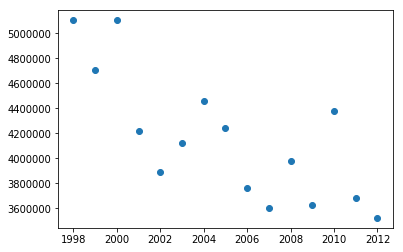

In [3]:
prod_per_year = df.groupby('year').agg(np.mean)['totalprod']

X = prod_per_year.index
X = X.values.reshape(-1, 1)

y = prod_per_year.values
y = y.reshape(-1,1)

plt.scatter(X, y)
plt.show()

# Create and Train a Linear Regression Model
We create a linear regression model from scikit-learn called regr. Then we fit the model using X and y. Since we only included one feature (year) within X, there will only be one coefficient in our linear model.

In [4]:
regr = LinearRegression()
regr.fit(X, y)
print('Model Coefficient:', regr.coef_)
print('Model Intercept:', regr.intercept_)

Model Coefficient: [[-88303.18915238]]
Model Intercept: [1.81208083e+08]


We create a list called y_predict that is the predictions your regr model would make on the X data. Notice that the predictions fall onto a straight line because we are using a linear model.

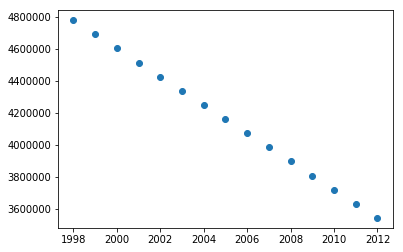

In [5]:
y_predict = regr.predict(X)
plt.scatter(X, y_predict)
plt.show()

# Generate Predictions
We used our model to predict honey output from 2013 to 2050.

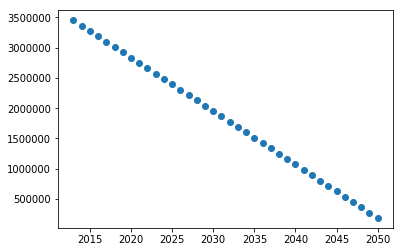

In [6]:
X_future = np.arange(2013, 2051)
X_future = X_future.reshape(-1, 1)
future_predict = regr.predict(X_future)

plt.scatter(X_future, future_predict)